<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/deeplearning1005_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quadratic_model learning(Neural Network)


torch.Size([100])
torch.Size([100])
Epoch [100/1000], Loss: 57.9427
Epoch [200/1000], Loss: 36.3399
Epoch [300/1000], Loss: 24.5912
Epoch [400/1000], Loss: 16.0138
Epoch [500/1000], Loss: 10.8154
Epoch [600/1000], Loss: 8.0174
Epoch [700/1000], Loss: 6.5918
Epoch [800/1000], Loss: 5.7465
Epoch [900/1000], Loss: 5.1477
Epoch [1000/1000], Loss: 4.7420


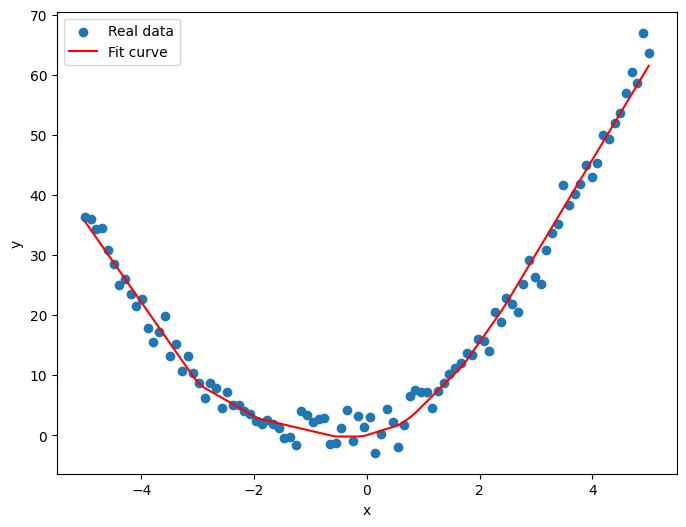

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
torch.manual_seed(16) #for fixed model
def generate_quadratic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y = 2 * x**2 + 3 * x + 1 + torch.randn(num_samples) * 2
    return x, y

model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
# Create an optimizer
criterion = nn.MSELoss()  # Mean squared error loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_samples = 100
x, y = generate_quadratic_data(num_samples)
print (x.shape)
print (y.shape)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward propagation
    outputs = model(x.unsqueeze(1)) #Increase dimensions
    loss = criterion(outputs, y.unsqueeze(1)) #Increase dimensions
    # or loss = criterion(outputs.squeeze(), y)
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')



# Plot the fitted curve
model.eval()
with torch.no_grad():
    x_test = torch.linspace(-5, 5, 100)
    y_pred = model(x_test.unsqueeze(1))

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.numpy(), 'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()